In [1]:
from kmeans import KMeansClustering
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
km = KMeansClustering()
km.open("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
km.filter(HS='0', TR='0', AG='0')
cleaned_data = km.clean()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)


INFO:root:Original data length: 9000
INFO:root:After applying filters: 5093
INFO:root:Data length after removing invalid tweets: 1030
INFO:root:Explained variance of the SVD step: 29%


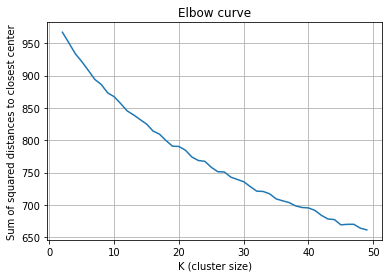

In [4]:
%matplotlib inline
km.plot_elbow_curve(max_k=50, X=X)

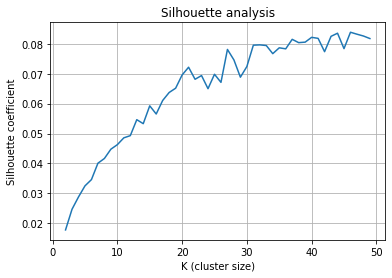

In [5]:
%matplotlib inline
km.plot_silhouette_analysis(max_k=50, X=X)

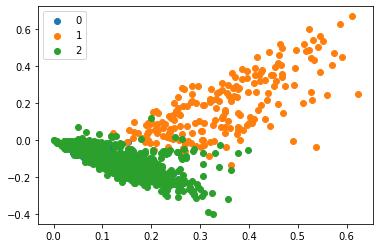

In [8]:
import matplotlib.pyplot as plt
import numpy as np

K= 20
km_model = km.cluster(X=X, K=K)

#predict the labels of clusters.
label = km_model.predict(X)

#filter rows of original data
filtered_label0 = X[label == 0]
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [6]:
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 immigrant children parents song illegal america white families kids away

Cluster 1:
 men women rape trash say woman like just saying bitch

Cluster 2:
 like bitch people just fuck cunt woman dick don whore



In [7]:
km.cluster(X= X, K=K)
km.print_most_representative_samples(X=X, num_samples=5)

Cluster 0: most representative sample indices: [429 974 868 333 861]
['7323', "It's what I do, it's who I am 😊", '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8935', 'Im so sick of people treating me like SHIT then try to come back in my life after they changed Fuck you fuck your growth cause idgaf skank bitch', '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8498', "who the fuck is calling my girl a whore and a bitch? She hasn't even been at that school for a whole month, people are fucking stupid", '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['6849', 'I sit here and wonder sometimes like what a man have to be going through to just want to rape a woman dude like it’s sick', '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8486', "I can be a rude cunt sometimes but don't be a bitch about it👍💯 just lax it out and kick back✊💯", '0', '0